### SEGMENTATION CLIENTS ( DOMAINE DE L'INDUSTRIE) 

##### CHARGEMENT ET NETOYAGE DES DONNEES.

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("data.csv")
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Determinons la taille de la base de données utilisée.
data.shape

(541909, 8)

In [4]:
# Determinons le nombre de clients distinct
len(data['CustomerID'].unique())

4373

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### Supprimons les valeurs manquantes

In [8]:
data=data.dropna()

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
data.shape

(406829, 8)

##### Supprimons les colones :'InvoiceNo', 'StockCode'

In [11]:
data.drop(['InvoiceNo','StockCode'],axis=1,inplace=True)
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


##### VECTORISATION DE LA COLONNE DESCRIPTION

Creons une fonction qui nettoie la colonne description.Il utilise des expressions regulieres pour supprimer la ponctuation et reduire les majuscules.

In [12]:
#Creation de la fonction clean
import re
def clean(description):
    return re.sub(r'[^\w\s]','',description).lower()

In [13]:
#Une demonstration de la fonction clean.
clean('HI,!!!')

'hi'

In [14]:
# Utilisons la fonction apply pour appliquer la fonction clean a la colonne description.
data['Description']=data['Description'].apply(clean)
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
# Reinitialiser l'index et créer une nouvelle colonne.

data=data.reset_index().drop('index',axis=1)

In [16]:
# Creons une colonne qui est le montant total d'argent.
data['total']= data['UnitPrice']*data['Quantity']

In [17]:
# Vectorisation simple de sac de mot( au lieu  TD IDF qui convient mieux aux long textes)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(stop_words='english')

In [18]:
# Ajustons le vectorizeur sur les données et effectuons une transformation.

descriptions= vectorizer.fit_transform(data['Description'])
descriptions


<406829x2093 sparse matrix of type '<class 'numpy.int64'>'
	with 1640936 stored elements in Compressed Sparse Row format>

###### REGROUPONS LES PRODUITS ET DREONS DES FONCTIONNALITES

In [19]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5)
kmeans.fit(descriptions)

KMeans(n_clusters=5)

In [20]:
# Attribuer a chaque article achetté quelque soit l'étiquette une nouvelle colonne product

data['Product']=kmeans.labels_

data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total,Product
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,1


In [21]:
# Creons un nouveau DataFrame nommé customer.
clients = pd.DataFrame({'CustomerID':data['CustomerID'].unique()})
clients.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [22]:
# Creons 5 colonnes; une pour chaque categorie produit
clients['Product0']=0
clients['Product1']=0
clients['Product2']=0
clients['Product3']=0
clients['Product4']=0
clients.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,0,0,0,0,0
1,13047.0,0,0,0,0,0
2,12583.0,0,0,0,0,0
3,13748.0,0,0,0,0,0
4,15100.0,0,0,0,0,0


In [23]:
# Remplissage du DataFrame Client
from tqdm import tqdm

for index in tqdm(range(len(data))):
    customerID=data.loc[index,'CustomerID']
    product_category=data.loc[index, 'Product']
    product_price=data.loc[index, 'total']
    customers_table_index=clients[clients['CustomerID']==customerID].index[0]
    clients.loc[customers_table_index,'Product'+str(product_category)]+= product_price

100%|█████████████████████████████████████████████████████████████████████████| 406829/406829 [07:10<00:00, 944.63it/s]


In [24]:
data

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total,Product
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,1
...,...,...,...,...,...,...,...,...
406824,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680.0,France,10.20,0
406825,childrens apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France,12.60,2
406826,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2
406827,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2


##### CREONS DES DESCRIPTIONS D'HISTORIQUES D'ACHHATS. 

nous créons 5 colonnes (nombre,maximum,minimum,moyennne,somme) qui sont cinq indicateurs numerique de l'historique d'achat d'un client.

In [25]:
clients['PurchaseCount']=0
clients['PurchaseMin']=0
clients['PurchaseMax']=0
clients['PurchaseMean']=0
clients['PurchaseSum']=0
clients.head()


,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,0.00,848.16,4119.17,321.30,0.0,0,0,0,0,0
1,13047.0,34.68,43.05,2482.99,518.38,0.0,0,0,0,0,0
2,12583.0,185.64,1446.34,4097.32,1373.34,84.7,0,0,0,0,0
3,13748.0,47.76,0.00,848.41,52.08,0.0,0,0,0,0,0
4,15100.0,0.00,0.00,635.10,0.00,0.0,0,0,0,0,0


In [39]:
from tqdm import tqdm 
for index in tqdm(range(len(clients))):
    customerID=clients.loc[index,'CustomerID']
    history=data[data['CustomerID']==customerID]['total']
    clients.loc[index,'PurchaseCount']=history.count()
    clients.loc[index,'PurchaseMin']=history.min()
    clients.loc[index,'PurchaseMax']=history.max()
    clients.loc[index,'PurchaseMean']=history.mean()
    clients.loc[index,'PurchaseSum']=history.sum()

100%|████████████████████████████████████████████████████████████████████████| 406829/406829 [3:34:57<00:00, 31.54it/s]


##### Mise en place d'une fonctionnalité etrangere.

Il s'agit de savoir si un client vient du Royaume Uni ou pas
(Effectuer des recherches pour cette partie).

In [27]:
# Creation de la colonne Etranger
clients['Etranger']=0

In [83]:
# for index in tqdm(range(len(clients))):
#     customerID=clients.loc[index,'CustomerID']
#     customerCountry= data[data['CustomerID']==customerID].reset_index().loc[0,'Country']
#     if customerCountry!='Royaume-Uni':
#         clients.loc[index,'Foreign']=1
    

##### Mise en place des clusters  (Utilisation d'un score de silhouette)

MISE A L'ECHELLE DES DONNEES

In [45]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_customers=scaler.fit_transform(clients)


In [47]:
scaled_customers=pd.DataFrame(scaled_customers,columns=clients.columns)
scaled_customers

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Etranger,Foreign
0,1.480857,-0.155702,0.672561,0.483407,0.113377,-0.152539,11.990880,0.019410,-0.027050,-0.093381,6.026601,0.0,0.0
1,-1.308028,-0.024476,-0.154165,0.201805,0.291646,-0.152539,7.518398,0.024834,-0.040674,-0.103129,3.499004,0.0,0.0
2,-1.577452,0.546739,1.286802,0.479647,1.065000,-0.070619,9.638971,0.008896,-0.018181,-0.001604,8.198634,0.0,0.0
3,-0.900989,0.025017,-0.198371,-0.079522,-0.130145,-0.152539,1.041009,0.033304,0.006533,0.039487,1.061414,0.0,0.0
4,-0.115944,-0.155702,-0.198371,-0.116235,-0.177254,-0.152539,0.192779,-0.015637,0.057349,0.604912,0.703185,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,NaN,NaN,NaN,NaN,NaN,NaN,-0.038556,NaN,NaN,NaN,-0.023339,0.0,NaN
406825,NaN,NaN,NaN,NaN,NaN,NaN,-0.038556,NaN,NaN,NaN,-0.023339,0.0,NaN
406826,NaN,NaN,NaN,NaN,NaN,NaN,-0.038556,NaN,NaN,NaN,-0.023339,0.0,NaN
406827,NaN,NaN,NaN,NaN,NaN,NaN,-0.038556,NaN,NaN,NaN,-0.023339,0.0,NaN


In [51]:
scaled_customers=scaled_customers.dropna()

Nous creons maintenant 6 modeles de KMeans ou chacun a des groupes de 2 a 7 .
Nous enregistrons les scores de silhouette dans une liste ; score.

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_nums=[2,3,4,5,6,7]
scores=[]
for cluster_num in cluster_nums:
    kmeans=KMeans(cluster_num)
    kmeans.fit(scaled_customers)
    clusters= kmeans.predict(scaled_customers)
    silhouette=silhouette_score(scaled_customers,clusters)
    scores.append(silhouette)
    
    
    
    
    
    

<AxesSubplot:xlabel='Clusters', ylabel='Silhouette Score'>

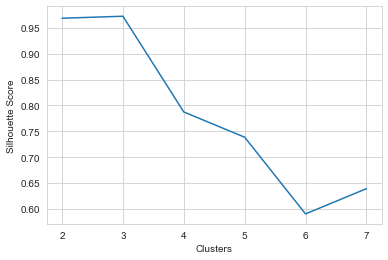

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('whitegrid')
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
sns.lineplot(x=cluster_nums,y=scores)


In [57]:
kmeans= KMeans(3)
kmeans.fit(scaled_customers)

KMeans(n_clusters=3)

In [58]:
kmeans.cluster_centers_

array([[-1.17039180e-04, -2.31713973e-02, -3.19992787e-02,
        -3.50609460e-02, -3.42111739e-02, -1.60869903e-02,
         3.29402673e+00,  1.01818077e-03, -1.86428527e-03,
        -2.40890972e-03,  1.81042412e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.32655432e-01,  4.85846984e+00,  5.30285409e+00,
         7.91819782e+00,  7.13004782e+00,  2.45745655e+00,
         2.27980949e+02, -3.74790690e-01,  3.25040915e-01,
        -1.38329061e-01,  7.40779963e+01,  0.00000000e+00,
         0.00000000e+00],
       [ 2.40191105e-01,  1.36066259e+01,  1.97282396e+01,
         2.02105092e+01,  2.01181582e+01,  1.00569376e+01,
         3.94362445e+01, -4.90356957e-01,  1.13864144e+00,
         1.84349674e+00,  1.99909882e+02,  0.00000000e+00,
         0.00000000e+00]])

#### VISUALISATION GRAPHIQUE  DES CLUSTERS

<AxesSubplot:>

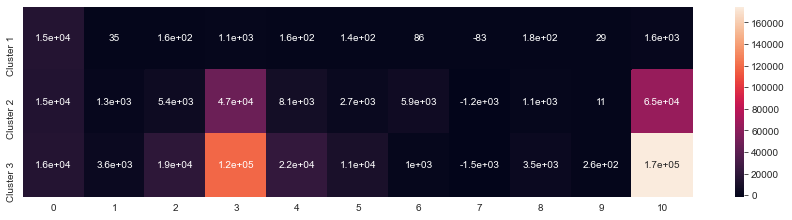

In [82]:
plt.figure(figsize=(15,3.5))
sns.heatmap(scaler.inverse_transform(kmeans.cluster_centers_)[:,0:11],annot=True,yticklabels=['Cluster 1','Cluster 2','Cluster 3'])

In [67]:
kmeans.cluster_centers_

array([[-1.17039180e-04, -2.31713973e-02, -3.19992787e-02,
        -3.50609460e-02, -3.42111739e-02, -1.60869903e-02,
         3.29402673e+00,  1.01818077e-03, -1.86428527e-03,
        -2.40890972e-03,  1.81042412e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.32655432e-01,  4.85846984e+00,  5.30285409e+00,
         7.91819782e+00,  7.13004782e+00,  2.45745655e+00,
         2.27980949e+02, -3.74790690e-01,  3.25040915e-01,
        -1.38329061e-01,  7.40779963e+01,  0.00000000e+00,
         0.00000000e+00],
       [ 2.40191105e-01,  1.36066259e+01,  1.97282396e+01,
         2.02105092e+01,  2.01181582e+01,  1.00569376e+01,
         3.94362445e+01, -4.90356957e-01,  1.13864144e+00,
         1.84349674e+00,  1.99909882e+02,  0.00000000e+00,
         0.00000000e+00]])

#### CONCLUSION 

Il existe trois principaux segments de clientèle.

Le segment de clientèle 1 achète de manière relativement égale parmi les 5 catégories, mais achète beaucoup à partir de la catégorie de produits 4. Ce segment de clientèle achète en moyenne 90 fois et retourne au plus 20 $ 
de produits. L'achat moyen dans le segment de clientèle 1 est d'environ 30. 


Le segment de clientèle 2 achète peu parmi les catégories de produits 1, 2 et 5. Ce segment revient fortement dans la catégorie de produits 3.
Ce segment de clientèle achète également massivement auprès de la catégorie 4.  Les achats moyens sont les plus élevés des trois groupes .

Le segment de clientèle 3 achète beaucoup parmi les cinq catégories, achetant, comme les deux autres segments de clientèle, largement auprès de la quatrième catégorie. 